# Домашнее задание по теме «Визуализация на Python. Matplotlib. Seaborn. Plotly»


Критерии оценки:
 - 1- выполнены все задания без ошибок,
 - 0.5 - выполнены все или часть заданий с незначительными ошибками (не менее половины заданий выполнено без ошибок)
 - 0- задания не выполнены, более половины заданий содержат ошибки

Формат сдачи: на платформу прикрепите jupyter notebook (то есть файл с расширением ipynb)

Загрузите набор данных из файла car_data.csv. Набор данных возьмите из ДЗ по PANDAS

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Загрузка данных из файла car_data.csv
file_path = '/Users/dinara/Applications/Solving-problems-from-courses/Аналитика данных и машинное обучение/Matplotlib, seaborn, plotly/car_data.csv'
df = pd.read_csv(file_path, index_col=0)

Для числовых признаков постройте гистограммы с использованием Matplotlib


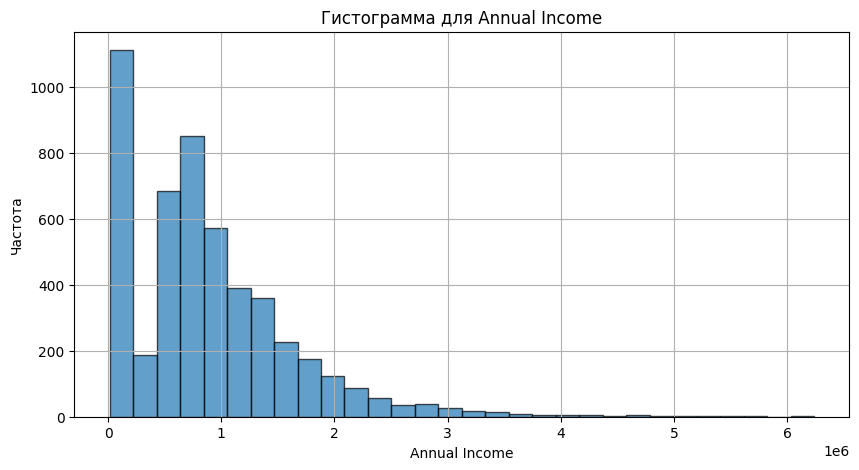

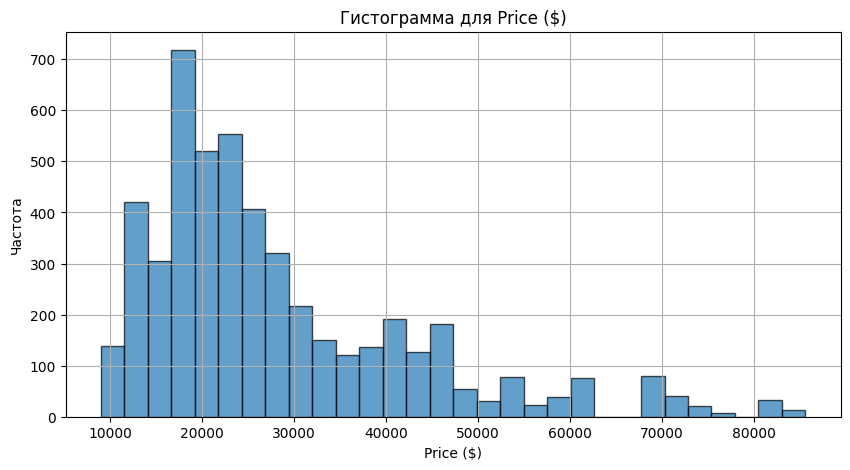

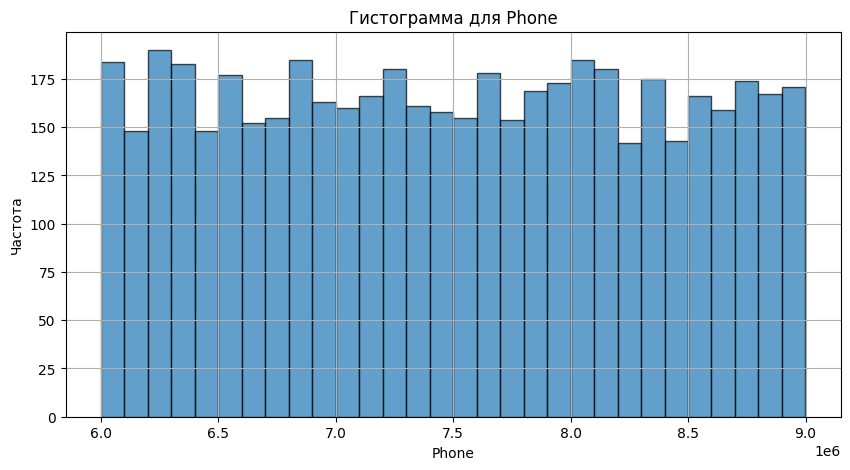

In [25]:
# Выбор всех числовых столбцов (типы данных int и float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Построение гистограмм для числовых столбцов
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.hist(df[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Гистограмма для {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

Постройте график типа box plot с горизонтальным размещением ящиков для визуализации зависимости стоимости автомобилей (Price ($)) от марки (Company)  с использованием Matplotlib

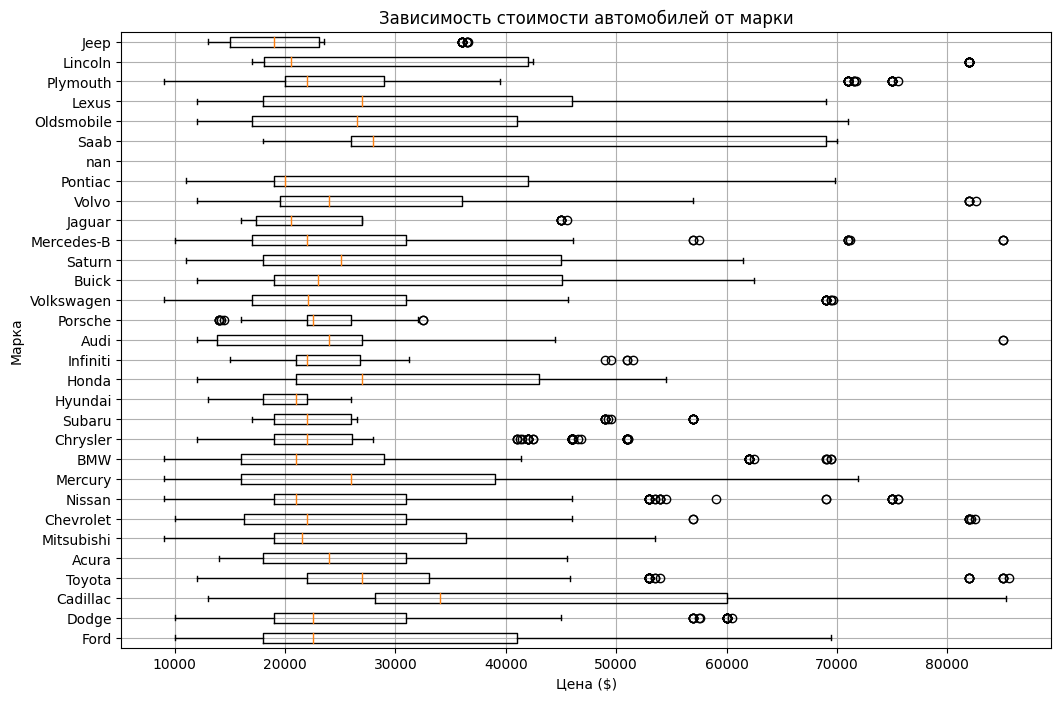

In [26]:
# Список уникальных марок автомобилей
companies = df['Company'].unique()

plt.figure(figsize=(12, 8))
data = []

# Заполнение данных для каждой марки
for company in companies:
    data.append(df[df['Company'] == company]['Price ($)'].dropna())

plt.boxplot(data, vert=False, labels=companies)
plt.title('Зависимость стоимости автомобилей от марки')
plt.xlabel('Цена ($)')
plt.ylabel('Марка')
plt.grid(True)

plt.show()

Постройте Scatter plot для признаков Price ($) и Annual Income, отметив разными цветами тип коробки передач (Transmission)  с использованием Matplotlib


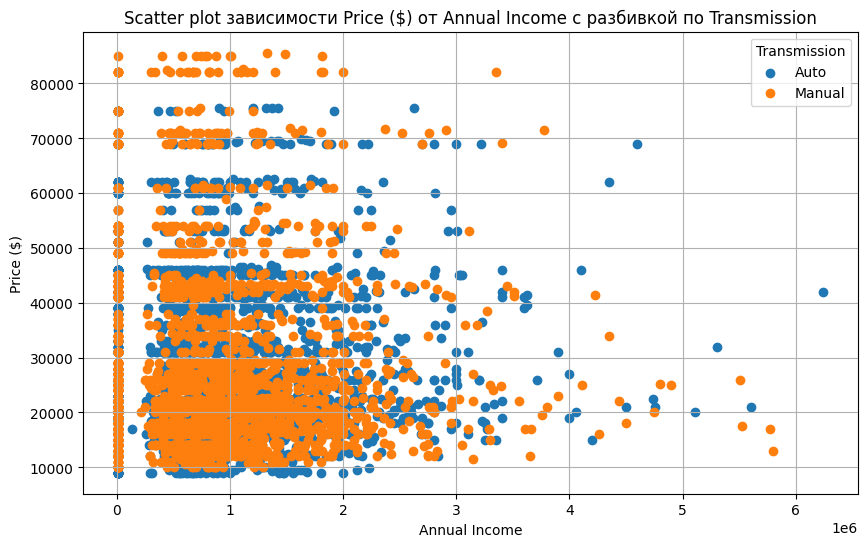

In [27]:
transmissions = df['Transmission'].unique()

plt.figure(figsize=(10, 6))

for transmission in transmissions:
    data = df[df['Transmission'] == transmission]
    plt.scatter(data['Annual Income'], data['Price ($)'], label=transmission)
plt.legend(title='Transmission')

plt.title('Scatter plot зависимости Price ($) от Annual Income с разбивкой по Transmission')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.grid(True)

plt.show()

Постройте хотя бы 1 график с использованием библиотеки Plotly. Сделайте выводы, какую информацию вы извлекли из графика/графиков

In [28]:
# Построение Scatter plot с использованием Plotly
fig = px.scatter(df, x='Annual Income', y='Price ($)', color='Transmission', 
                 title='Зависимость стоимости автомобилей от годового дохода с разбивкой по Transmission',
                 labels={'Annual Income': 'Годовой доход', 'Price ($)': 'Стоимость ($)', 'Transmission': 'Transmission'})

# Отображение графика
fig.show()

Зависимость от годового дохода: График показывает, как стоимость автомобилей изменяется в зависимости от годового дохода клиентов. Можно заметить, что в основном более высокий годовой доход соответствует более низкой стоимости автомобилей, хотя есть и исключения.

Влияние типа коробки передач: Цвет точек на графике обозначает тип коробки передач (Transmission). Это позволяет увидеть, как различные типы коробок передач связаны с ценой автомобилей при разном уровне годового дохода. Сложно заметить, есть ли закономерность в зависимости стоимости автомобиля от годового дохода.

Постройте хотя бы 1 график с использованием библиотеки Seaborn. Сделайте выводы, какую информацию вы извлекли из графика/графиков

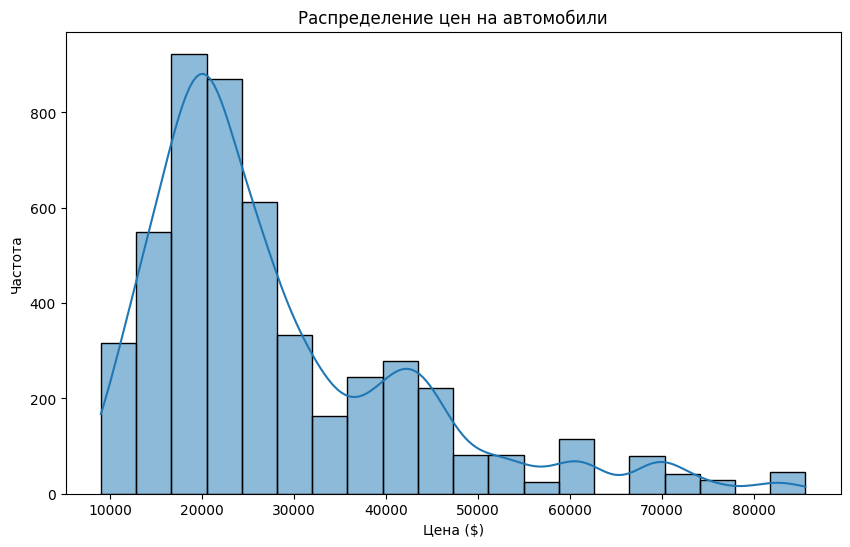

In [29]:
# Построение гистограммы с использованием Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Price ($)'], bins=20, kde=True)
plt.title('Распределение цен на автомобили')
plt.xlabel('Цена ($)')
plt.ylabel('Частота')
plt.show()

Распределение цен: Гистограмма показывает, как цены на автомобили распределены среди выборки данных. Можно видеть, что большинство автомобилей имеют относительно низкую цену, с пиком около значения 20000, и снижение цены по мере её увеличения.

Форма распределения: На гистограмме также видно, что распределение цен на автомобили может быть неоднородным, но в основном наблюдается нормальное распределение.